# Imports

In [1]:
import sys
sys.path.append("../src/")

from utils import safe_log

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset Read In

In [2]:
df = pd.read_csv("../data/dataset_generated_by_extrucal.csv")
df

,extruder_size,metering_depth,polymer_density,rpm,screw_pitch,flight_width,number_flight,throughput
0,90,2.7,900,90,162.0,14.4,2,164.332721
1,200,18.0,900,60,280.0,20.0,2,3119.815029
2,60,3.6,900,30,36.0,4.8,2,11.535960
3,150,4.5,900,80,180.0,24.0,2,512.994770
4,190,7.6,1400,50,304.0,38.0,2,1561.370337
...,...,...,...,...,...,...,...,...
1505275,240,12.0,1100,50,144.0,14.4,2,1395.113084
1505276,30,2.1,1100,90,48.0,3.6,1,20.119844
1505277,190,7.6,1200,30,190.0,38.0,1,670.173099
1505278,40,2.4,800,50,56.0,6.4,1,14.236114


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505280 entries, 0 to 1505279
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   extruder_size    1505280 non-null  int64  
 1   metering_depth   1505280 non-null  float64
 2   polymer_density  1505280 non-null  int64  
 3   rpm              1505280 non-null  int64  
 4   screw_pitch      1505280 non-null  float64
 5   flight_width     1505280 non-null  float64
 6   number_flight    1505280 non-null  int64  
 7   throughput       1505280 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 91.9 MB


In [4]:
df.nunique()

extruder_size           24
metering_depth         114
polymer_density          7
rpm                     10
screw_pitch            102
flight_width           116
number_flight            2
throughput         1354753
dtype: int64

# Data Distribution Check

## 1. Features

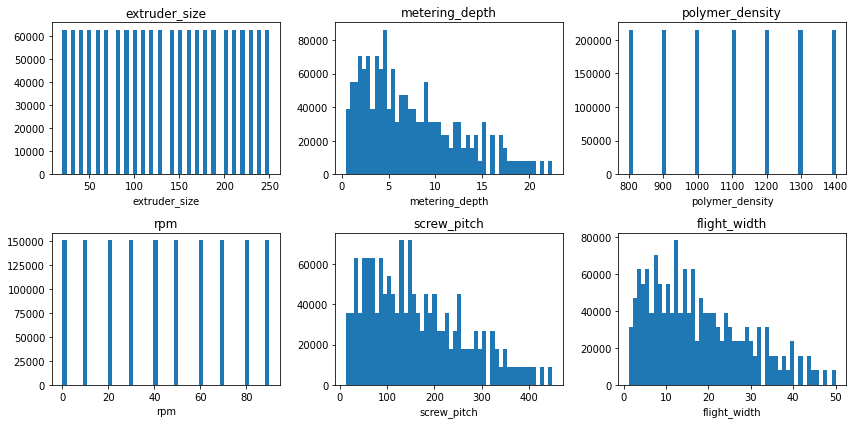

In [5]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)
r = 0
c = 0
for feature in df.columns[:6]:
    axs[r, c].hist(df[feature], bins=50)
    axs[r, c].set_title(f"{feature}")
    axs[r, c].set_xlabel(f"{feature}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

#### After Log Transformation for `metering_depth`, `screw_pitch`, and `flight_width`

In [6]:
log_features = ["metering_depth", "screw_pitch", "flight_width"]

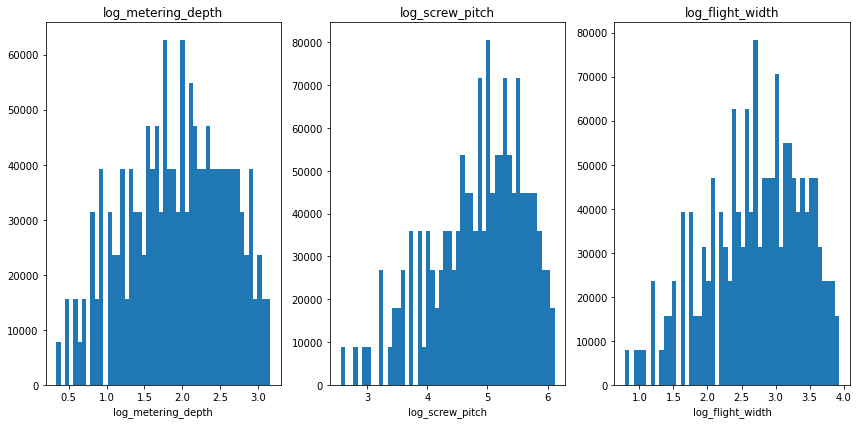

In [7]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)
for i, feature in enumerate(log_features):
    axs[i].hist(safe_log(df[feature]), bins=50)
    axs[i].set_title(f"log_{feature}")
    axs[i].set_xlabel(f"log_{feature}")
plt.tight_layout()
plt.show();

## 2. Target

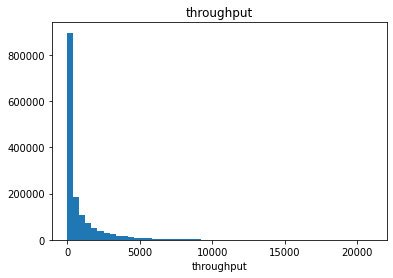

In [8]:
plt.figure()
plt.hist(df["throughput"], bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

#### After Log Transformation for `throughput`

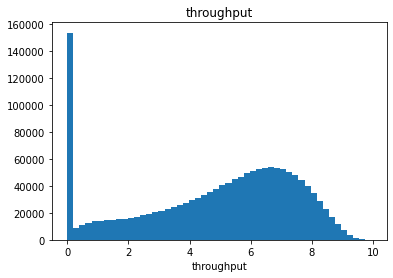

In [9]:
plt.figure()
plt.hist(safe_log(df["throughput"]), bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

# Conclusion

#### Log-transformation will be applied to `metering_depth`, `screw_pitch`, `flight_width`, and `throughput`